In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 200)
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline

In [3]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [ ]:
train.head()

In [ ]:
train.info()

In [4]:
train = pd.read_csv("../data/train.csv")
train.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)
train.fillna(0, inplace=True)
#train.info()

In [ ]:
train.head()

In [5]:
X = pd.get_dummies(train.ix[:,:len(train.columns)-1])
y = train.ix[:,len(train.columns)-1]

In [62]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_0,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_0,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_0,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_0,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_0,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_0,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,60

In [ ]:
X.info()

In [10]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.05,
          "max_depth": 50,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301,
          "nthread" : 4
          }
num_boost_round = 10000

print("Train a XGBoost model")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.012, random_state=10)

# y_train = np.log1p(X_train.SalePrice)
# y_valid = np.log1p(X_valid.SalePrice)
# dtrain = xgb.DMatrix(X_train[features], y_train)
# dvalid = xgb.DMatrix(X_valid[features], y_valid)

dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_valid, y_valid)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
#   early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=100, verbose_eval=True)

"""
print("Validating")
yhat = gbm.predict(xgb.DMatrix(X_valid[features]))
error = rmspe(X_valid.Sales.values, np.expm1(yhat))
print('RMSPE: {:.6f}'.format(error))


gbm = xgb.XGBClassifier()
gbm.fit(X_train, y_train)
print gbm
"""

Train a XGBoost model
[0]	train-rmse:188114	eval-rmse:199123
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 100 rounds.
[1]	train-rmse:179219	eval-rmse:189400
[2]	train-rmse:170830	eval-rmse:180806
[3]	train-rmse:162889	eval-rmse:173005
[4]	train-rmse:155361	eval-rmse:165735
[5]	train-rmse:148111	eval-rmse:158939
[6]	train-rmse:141320	eval-rmse:152484
[7]	train-rmse:134761	eval-rmse:145191
[8]	train-rmse:128676	eval-rmse:138632
[9]	train-rmse:122802	eval-rmse:132870
[10]	train-rmse:117233	eval-rmse:127422
[11]	train-rmse:111922	eval-rmse:122193
[12]	train-rmse:106857	eval-rmse:117529
[13]	train-rmse:102085	eval-rmse:112730
[14]	train-rmse:97554	eval-rmse:108179
[15]	train-rmse:93123.9	eval-rmse:103875
[16]	train-rmse:88983.7	eval-rmse:99997.4
[17]	train-rmse:84972.4	eval-rmse:96577.7
[18]	train-rmse:81136.9	eval-rmse:92958.3
[19]	train-rmse:77551.7	eval-rmse:89730.3
[20]	train-rmse:74116.3	eval-rmse:86

'\nprint("Validating")\nyhat = gbm.predict(xgb.DMatrix(X_valid[features]))\nerror = rmspe(X_valid.Sales.values, np.expm1(yhat))\nprint(\'RMSPE: {:.6f}\'.format(error))\n\n\ngbm = xgb.XGBClassifier()\ngbm.fit(X_train, y_train)\nprint gbm\n'

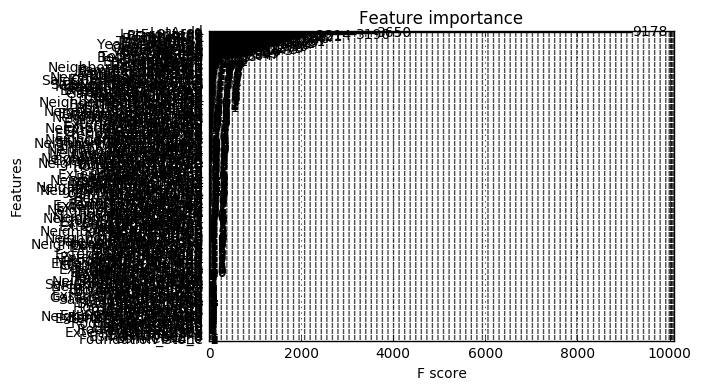

In [14]:
xgb.plot_importance(gbm)

In [11]:
score_dict = gbm.get_fscore()
score_list = []
len(score_dict)
for key, value in score_dict.iteritems():
    score_list.append([key, value])
print type(score_list)
score_list[0]
score_list = sorted(score_list, key = lambda x: x[1], reverse=True)
print score_list[:5]

<type 'list'>
[['Id', 29618], ['LotFrontage', 9374], ['LotArea', 8877], ['MSSubClass', 5624], ['BsmtUnfSF', 5347]]


In [75]:
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()
    
features = X_train.columns.tolist()
create_feature_map(features)
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

XGBoostError: [15:59:11] include/xgboost/././feature_map.h:83: unknown feature type, use i for indicator and q for quantity

In [73]:
X_train.columns.tolist()

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Se

In [78]:
gbm.get_fscore

<bound method Booster.get_fscore of <xgboost.core.Booster object at 0x7ff767dbadd0>>

In [26]:
from scipy.stats.stats import pearsonr
for fs in score_list:
    col_name = fs[0]  
    print col_name, fs[1], pearsonr(X_train[col_name], y_train )


Id 29618 (-0.022008697155311327, 0.40364592219487416)
LotFrontage 9374 (0.2079373146350369, 1.5037281345147279e-15)
LotArea 8877 (0.26402385004302681, 2.0081515530309393e-24)
MSSubClass 5624 (-0.082040177172473014, 0.0018213075137298422)
BsmtUnfSF 5347 (0.21469402706649074, 1.6943889848444484e-16)
YearBuilt 4846 (0.52252506249920538, 7.8451327546373905e-102)
BsmtFinSF1 4795 (0.38828740427186598, 4.2771116079897027e-53)
TotalBsmtSF 4279 (0.61516850556966429, 6.9964283307527166e-151)
GrLivArea 3930 (0.71117767409073662, 1.2503606583000994e-222)
YearRemodAdd 3550 (0.50555562882419913, 2.110072603497154e-94)
1stFlrSF 3420 (0.60720768190504881, 5.1053005039066048e-146)
OverallQual 3011 (0.79131771009883101, 5.4709971472758976e-310)
GarageArea 2976 (0.6246448703525761, 7.4328622874506493e-157)
MasVnrArea 2810 (0.47745582096699885, 5.5175827831783293e-83)
MoSold 2697 (0.042264708581032123, 0.10865425318433844)
OpenPorchSF 2629 (0.32177578330836848, 4.3145992772009194e-36)
WoodDeckSF 2203 (0.3

In [47]:
corr = train.corr()
price_corr = corr["SalePrice"]
price_corr = price_corr.to_dict()
# print price_corr
for ele in sorted(price_corr.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

SalePrice: 	1.0
OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
MasVnrArea: 	0.472614499005
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
GarageYrBlt: 	0.261366435103
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
LotFrontage: 	0.209623944799
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0256061300007
Id: 	-0.0219167194434
MiscVal: 	-0.0211895796403
B